In [1]:
from __future__ import division
import time

import matplotlib.pyplot as plt
import pandas as pd
import nltk

from PIL import Image
from wordcloud import WordCloud

%matplotlib inline

# some nicer colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

color_list = [COLOR1, COLOR2, COLOR3, COLOR4, COLOR5]

## Build all the dataframes

In [2]:
df_train = pd.DataFrame.from_csv('train.csv', index_col=None)
df_prod_desc = pd.DataFrame.from_csv('product_descriptions.csv', index_col=None)
df_attrib = pd.DataFrame.from_csv('attributes.csv', index_col=None)
df_brand = df_attrib[df_attrib.name == "MFG Brand Name"][["product_uid", "value"]].rename(columns={"value": "brand"})

df = pd.merge(df_train, df_prod_desc, how='left', on='product_uid')
df = pd.merge(df, df_brand, how='left', on='product_uid')

## Relevance Summary Stats

In [6]:
print df_train.relevance.describe().round(2)

count    74067.00
mean         2.38
std          0.53
min          1.00
25%          2.00
50%          2.33
75%          3.00
max          3.00
Name: relevance, dtype: float64


## Relative Frequency Distribution of Relevance

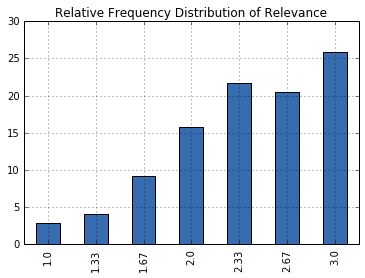

In [7]:
totalc = len(df_train)
df_train_rf = df_train.relevance.value_counts() / totalc * 100
df_train_rf = df_train_rf.sort_index()
df_train_rf = df_train_rf[df_train_rf > 1]

df_train_rf.plot(title='Relative Frequency Distribution of Relevance', kind='bar', color=COLOR5, grid=True);

## Which products are returned most often in search queries with a relevance of 3?

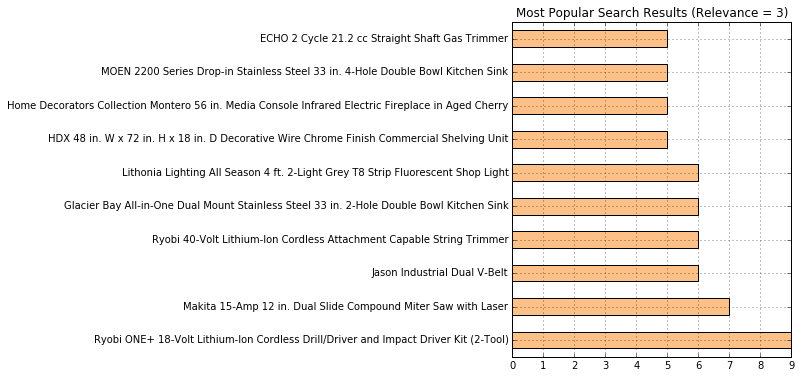

In [43]:
df_train_relprod = df_train[df_train.relevance == 3]
df_train_relprod.product_title.value_counts().head(10).plot(kind='barh', title='Most Popular Search Results (Relevance = 3)', figsize=(5, 6), grid=True, color=COLOR3);

## Which products are returned most often in search queries (regardless of relevance)?

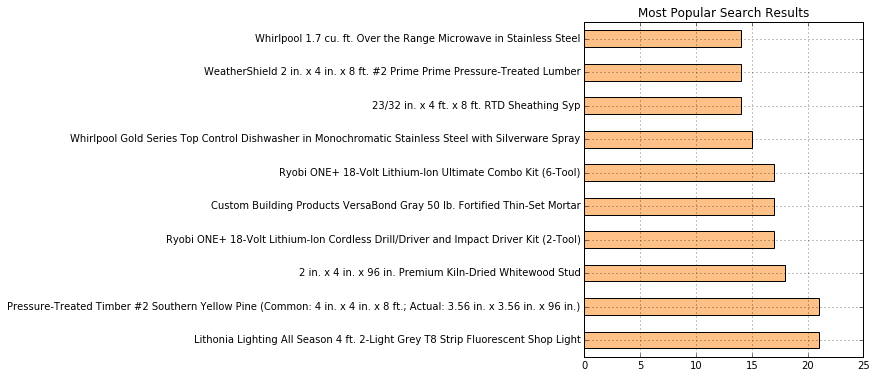

In [19]:
df_train.product_title.value_counts().head(10).plot(kind='barh', title='Most Popular Search Results', figsize=(5, 6), grid=True, color=COLOR3);

## Which words occur most frequently in the "product_title"?

In [23]:
# Build lists of words, symbols, and tokens from product_title

stop_words = ['for', 'and', 'with', 'x', 'ft.', 'in', 'inch', 'a', 'without', 'W']
product_words_list = []
product_symbols_list = []
product_tokens = []
excluded = 0

products = df_train.product_title

for product in products:
    temps = []
    try:
        temps = nltk.word_tokenize(product)
        product_tokens.append(temps)
    except UnicodeDecodeError:
        excluded += 1
        pass
    for temp in temps:
        try:
            if temp in stop_words:
                pass
            elif temp.isalpha():
                product_words_list.append(temp)
            elif '-' == temp:
                product_symbols_list.append(temp)
            elif '-' in temp:
                product_words_list.append(temp)
            elif '.' in temp and '.' != temp:
                product_words_list.append(temp)
            else:
                product_symbols_list.append(temp)
        except UnicodeDecodeError:
            excluded += 1
            pass

print "excluded items due to nltk UnicodeDecodeError =", excluded

excluded items due to nltk UnicodeDecodeError = 58


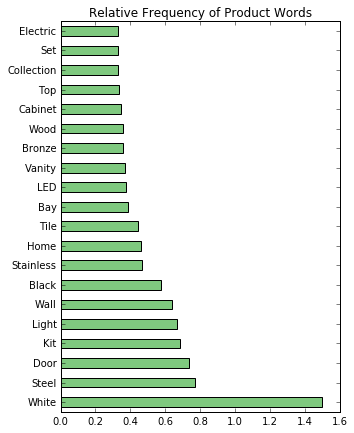

In [24]:
df_train_pwl = pd.DataFrame(product_words_list)
freq_pwl = df_train_pwl[0].value_counts().sort_values(ascending=False).head(20) / len(df_train_pwl) * 100
freq_pwl.plot(kind='barh', color=COLOR1, figsize=(5, 7), title='Relative Frequency of Product Words');

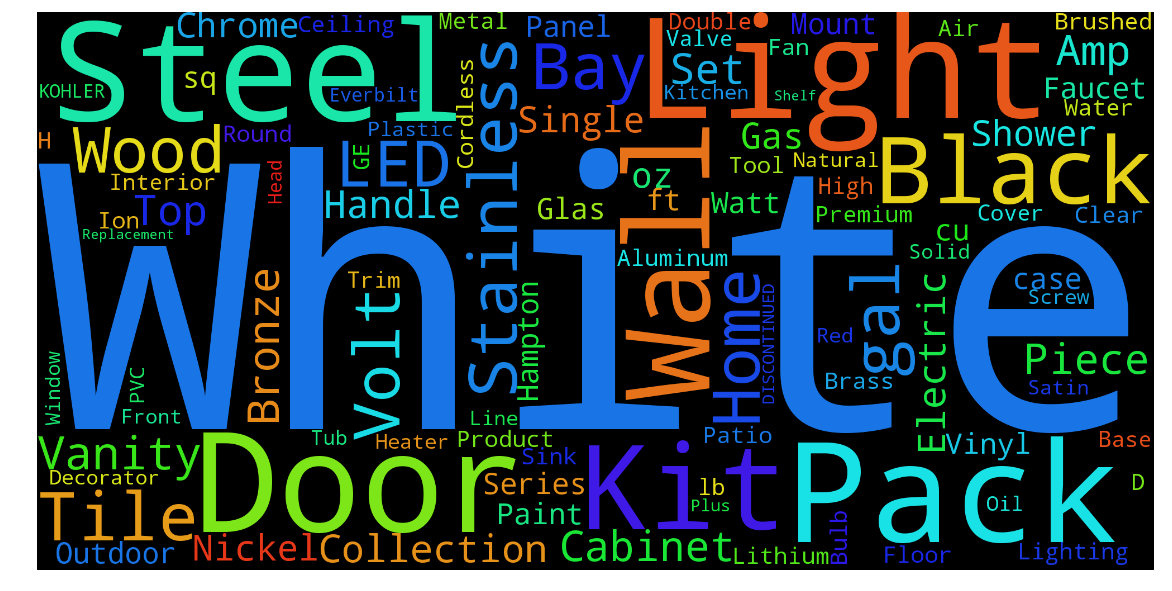

In [25]:
# Create a string of Product Words from product_word_list
product_words_string = ' '.join(product_words_list)

# Create wordcloud object
prod_wordcloud = WordCloud(background_color='black', max_words=100, width=2000, height=1000).generate(product_words_string)

# Plot
plt.figure(figsize=(20,10))
plt.imshow(prod_wordcloud);
plt.axis('off');

## Which words occur most frequently in the "search_term"?

In [26]:
# Build lists of words, symbols, and tokens from search_term

stop_words = ['for', 'and', 'with', 'x', 'ft.', 'in', 'inch', 'a', 'without', 'W']
search_word_list = []
search_symbol_list = []
search_tokens = []
excluded = 0

searches = df_train.search_term

for search in searches:
    temps = []
    try:
        temps = nltk.word_tokenize(search)
        search_tokens.append(temps)
    except UnicodeDecodeError:
        excluded += 1
        pass
    for temp in temps:
        try:
            if temp in stop_words:
                pass
            elif temp.isalpha():
                search_word_list.append(temp)
            elif '-' == temp:
                search_symbol_list.append(temp)
            elif '-' in temp:
                search_word_list.append(temp)
            elif '.' in temp and '.' != temp:
                search_word_list.append(temp)
            else:
                search_symbol_list.append(temp)
        except UnicodeDecodeError:
            excluded += 1
            pass

print "excluded items due to nltk UnicodeDecodeError =", excluded

excluded items due to nltk UnicodeDecodeError = 0


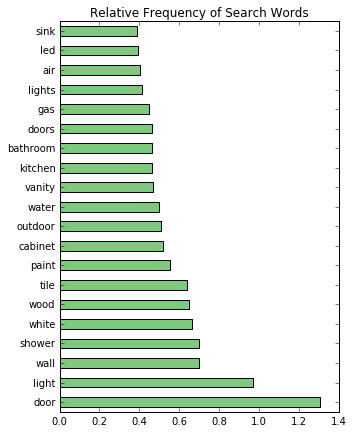

In [27]:
df_train_swl = pd.DataFrame(search_word_list)
freq_swl = df_train_swl[0].value_counts().sort_values(ascending=False).head(20) / len(df_train_swl) * 100
freq_swl.plot(kind='barh', color=COLOR1, figsize=(5, 7), title='Relative Frequency of Search Words');

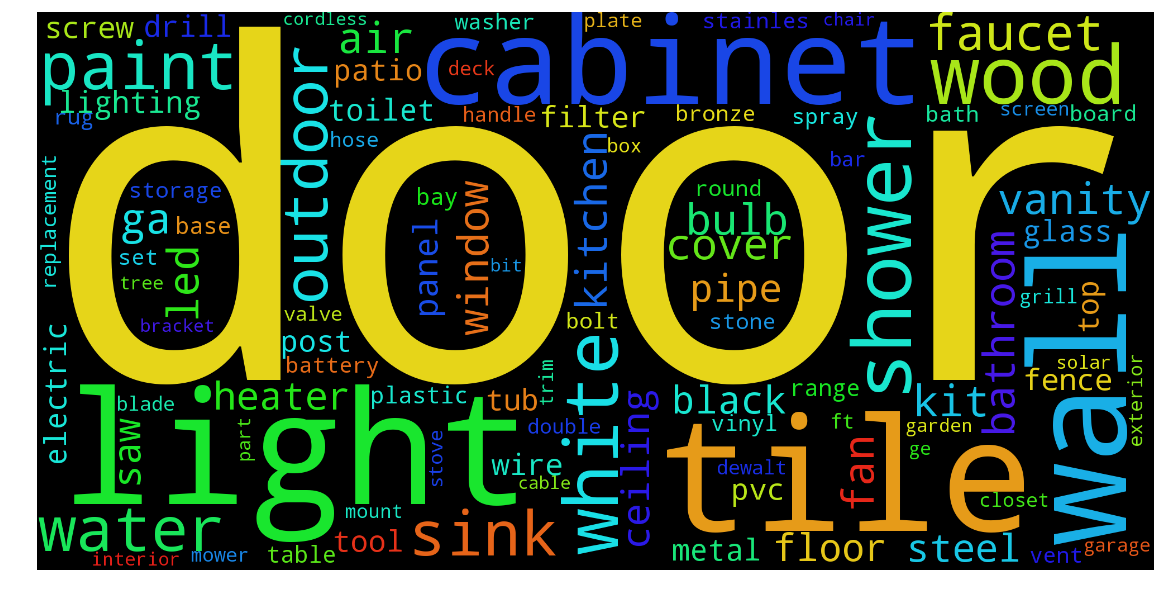

In [28]:
# Create a string of Product Words from product_word_list
search_word_string = ' '.join(search_word_list)

# Create wordcloud object
prod_wordcloud = WordCloud(background_color='black', max_words=100, width=2000, height=1000).generate(search_word_string)

# Plot
plt.figure(figsize=(20,10))
plt.imshow(prod_wordcloud);
plt.axis('off');

## Which brands show up most often in search queries?

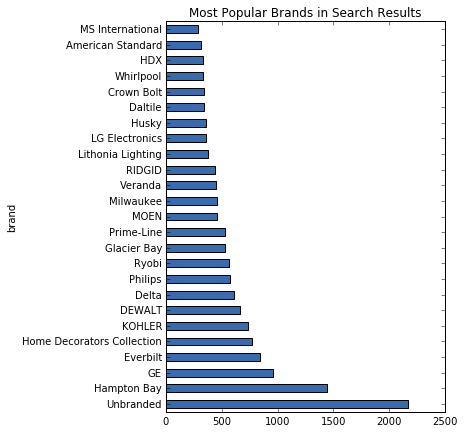

In [80]:
df.groupby(['brand'], as_index=False).size().sort_values(ascending=False).head(25).plot(kind='barh', title='Most Popular Brands in Search Results', color=COLOR5, figsize=(5, 7));

## Summary stats for word matching between search terms and product title/product description.

In [75]:
# Import all dataframes and build the train dataframe
start_time = time.time()
df_train_final_stats = pd.DataFrame.from_csv('df_train_final_stats.csv', index_col=None, encoding="ISO-8859-1")
print("--- Files Loaded: %s minutes ---" % round(((time.time() - start_time)/60),2))

--- Files Loaded: 0.01 minutes ---


In [77]:
df_tfs = df_train_final_stats[['id','product_uid', 'product_title', 'search_term','relevance','leveneditdist_query_in_title','leveneditdist_query_in_product_description','len_of_query','len_of_title', 'len_of_description','len_of_brand','query_in_title','query_in_description','query_last_word_in_title','query_last_word_in_description', 'word_in_title','word_in_description',]]

In [83]:
df_tfs.head(1)

,id,product_uid,product_title,search_term,relevance,leveneditdist_query_in_title,leveneditdist_query_in_product_description,len_of_query,len_of_title,len_of_description,len_of_brand,query_in_title,query_in_description,query_last_word_in_title,query_last_word_in_description,word_in_title,word_in_description
0,2,100001,simpson strong tie 12 gaug angl,angl bracket,3,27,754,2,6,135,3,0,0,0,0,1,1


In [82]:
df_tfs.query_in_title.value_counts()

0    65328
1     8670
2       69
Name: query_in_title, dtype: int64

In [90]:
print 'search_term is found in product_title:', round((8670+69) / 65328 * 100, 1), '%'

search_term is found in product_title: 13.4 %


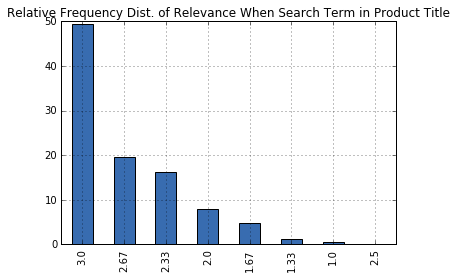

In [98]:
match_length = len(df_tfs[df_tfs.query_in_title > 0])
wordmatch_rel = df_tfs[df_tfs.query_in_title > 0].relevance.value_counts() / match_length * 100
wordmatch_rel.plot(title='Relative Frequency Dist. of Relevance When Search Term in Product Title', kind='bar', color=COLOR5, grid=True);

In [84]:
df_tfs.query_in_description.value_counts()

0     67388
1      3819
2      1542
3       689
4       283
5       152
6        76
7        46
8        28
9        13
10       13
11        5
15        3
12        2
13        2
19        1
14        1
16        1
17        1
18        1
24        1
Name: query_in_description, dtype: int64

In [89]:
print 'search_term is found in product_title:', round((3819+1542+689+283+152+76+46+28+26+18) / 65328 * 100, 1), '%'

search_term is found in product_title: 10.2 %


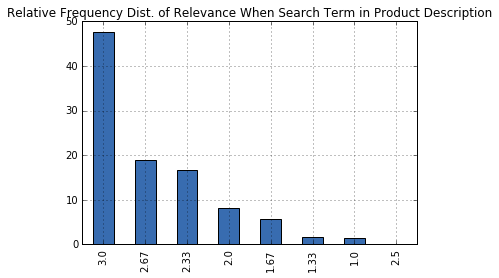

In [99]:
match_length = len(df_tfs[df_tfs.query_in_description > 0])
wordmatch_rel = df_tfs[df_tfs.query_in_description > 0].relevance.value_counts() / match_length * 100
wordmatch_rel.plot(title='Relative Frequency Dist. of Relevance When Search Term in Product Description', kind='bar', color=COLOR5, grid=True);

In [100]:
wordmatch_rel

3.00    47.477167
2.67    18.954933
2.33    16.754005
2.00     8.144932
1.67     5.719419
1.33     1.587064
1.00     1.347507
2.50     0.014972
Name: relevance, dtype: float64